In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#df = pd.read_feather('/kaggle/input/nos-news-articles-2015-2024oct/NOS_NL_articles_2015_mar_2025.feather') OLD

#read dataset / latest version: sept 2025 
df = pd.read_feather("C:\\Users\\Max van der Slot\\Downloads\\NOS_NL_articles_2015_jul_2025.feather")

# Ensure 'published_time' column is in datetime format
df['published_time'] = pd.to_datetime(df['published_time'])

# Display last three rows
df.tail(3)

,channel,url,type,title,keywords,section,description,published_time,modified_time,image,content
296931,nos,https://nos.nl/artikel/2577138,article,Meer dan 70 verwaarloosde honden weggehaald ui...,"verwaarloosde dieren, Oosterwolde",Regionaal nieuws,De honden zijn naar een opvanglocatie gebracht...,2025-07-31 22:43:35,2025-07-31 22:43:35,https://cdn.nos.nl/image/2025/07/31/1255340/10...,<h1>Meer dan 70 verwaarloosde honden weggehaal...
296932,nos,https://nos.nl/artikel/2577139,article,Vitesse is geen profclub meer: 'Niemand kan ge...,"Vitesse, voetbal",Voetbal,Vitesse is door de uitspraak van de beroepscom...,2025-07-31 22:45:18,2025-07-31 23:19:15,https://cdn.nos.nl/image/2025/08/01/1255453/10...,<h1>Vitesse is geen profclub meer: 'Niemand ka...
296933,nos,https://nos.nl/artikel/2577141,article,Vijf van de zes Nederlandse beachvolleybalkopp...,"EK beachvolleybal, beachvolleybal",Beachvolleybal,Vijf van de zes Nederlandse beachvolleybalkopp...,2025-07-31 23:14:19,2025-07-31 23:14:19,https://cdn.nos.nl/image/2025/07/31/1255347/10...,<h1>Vijf van de zes Nederlandse beachvolleybal...


In [13]:
# Count the number of rows
total_rows = len(df)

# Count the number of rows after filtering on nos-channel (and remove nieuwsuur-articles)
df = df[(df['channel'] == 'nos')]

total_rows_filtered = len(df)

print("Total number of rows:", total_rows, "\nFiltered ('nos' channel): ", total_rows_filtered)

Total number of rows: 296934 
Filtered ('nos' channel):  287018


In [14]:
count_article = df[df['type'] == 'article'].shape[0]
count_liveblog = df[df['type'] == 'liveblog'].shape[0]

print("number of articles: ", count_article)
print("number of liveblogs: ", count_liveblog)

number of articles:  282275
number of liveblogs:  4743


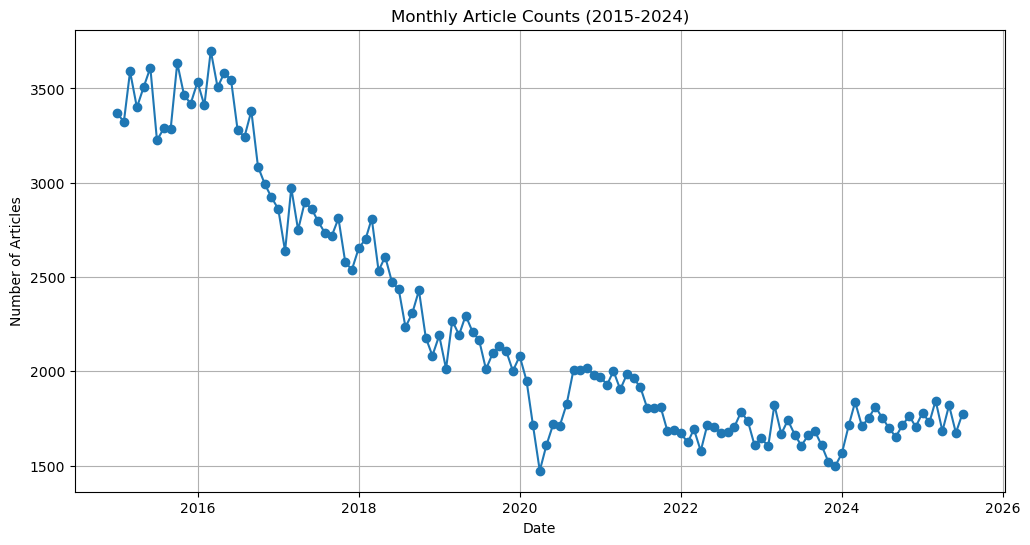

In [15]:
# Extract the year and month from 'published_time' as a new column in YYYY-MM format
df['year_month'] = df['published_time'].dt.to_period('M')

# Count the number of articles per month
monthly_counts = df.groupby('year_month').size()

# Convert to DataFrame for plotting
monthly_counts_df = monthly_counts.reset_index(name='article_count')
monthly_counts_df['year_month'] = monthly_counts_df['year_month'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts_df['year_month'], monthly_counts_df['article_count'], marker='o')
plt.title("Monthly Article Counts (2015-2024)")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid()
plt.show()

In [16]:
# Define the specific timestamp to filter
specific_time = "2024-10-12 12:06:43"

# Filter the dataframe for the exact published_time and select only the desired columns
row_specific_time = df[df['published_time'] == specific_time][['content']]

# Print the selected columns in a tabular format
print(row_specific_time.to_string(index=False))

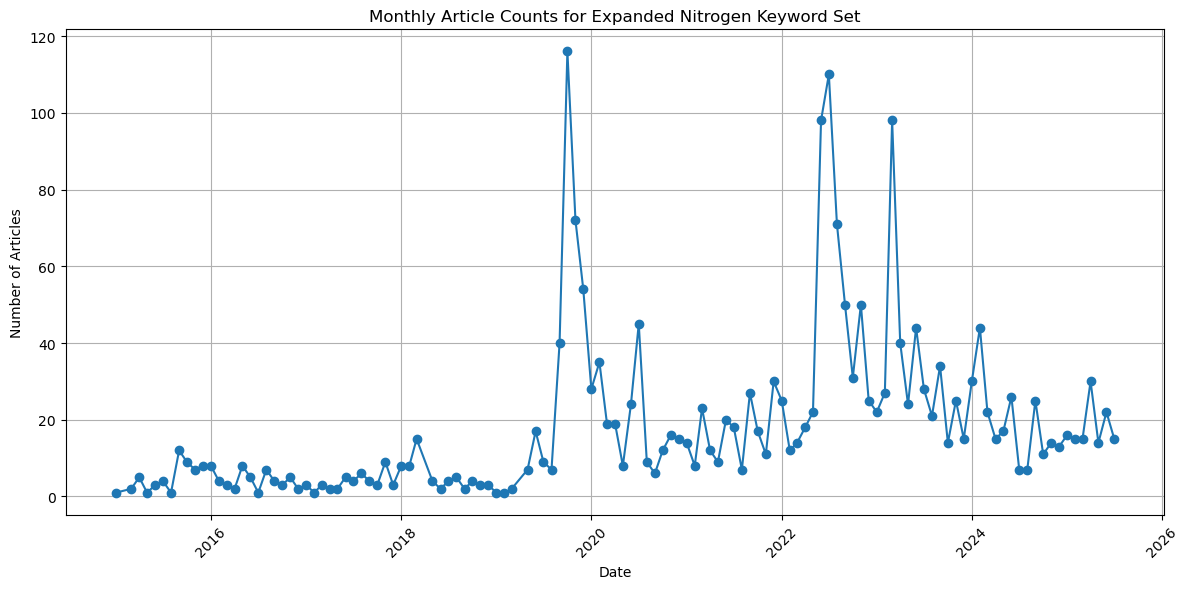

Total matched articles: 2242


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

search_words = [
    "stikstof",
    "stikstofcrisis",
    "stikstofbeleid",
    "stikstofprobleem",
    "boerenprotest",
]

# Maak 1 regex-patroon van alle keywords (OR)
pattern = "|".join(search_words)

# Kolommen waarin je wil zoeken
cols = ["title", "keywords", "section", "description", "content"]

# Filter: match als 1 van de keywords voorkomt in 1 van de kolommen
mask = False
for c in cols:
    mask = mask | df[c].astype(str).str.contains(pattern, case=False, na=False, regex=True)

df_filtered = df[mask].copy()

# Monthly grouping
df_filtered["published_time"] = pd.to_datetime(df_filtered["published_time"], errors="coerce")
df_filtered = df_filtered.dropna(subset=["published_time"])
df_filtered["year_month"] = df_filtered["published_time"].dt.to_period("M")

monthly_counts = df_filtered.groupby("year_month").size()
monthly_counts_df = monthly_counts.reset_index(name="article_count")
monthly_counts_df["year_month"] = monthly_counts_df["year_month"].dt.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts_df["year_month"], monthly_counts_df["article_count"], marker="o", linestyle="-")
plt.title("Monthly Article Counts for Expanded Nitrogen Keyword Set")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Total matched articles:", len(df_filtered))


In [29]:
import pandas as pd

# 1) Read the Google Trends export (first row is usually metadata)
df_trends = pd.read_csv(
    r"C:\Users\Max van der Slot\Downloads\multiTimeline2.csv",
    skiprows=1
)

# 2) Kijk even hoeveel kolommen je hebt
print("Columns found:", list(df_trends.columns))

# 3) Neem de eerste kolom als datum, en de eerste niet-datum kolom als trends
date_col = df_trends.columns[0]

# Soms heet die tweede kolom bv. "stikstof: (Netherlands)"
value_col = df_trends.columns[1]

# 4) Maak een schone trends-df met precies 2 kolommen
df_trends = df_trends[[date_col, value_col]].copy()
df_trends = df_trends.rename(columns={date_col: "date", value_col: "Google_Trends_index"})

# 5) Datetime + opschonen
df_trends["date"] = pd.to_datetime(df_trends["date"], errors="coerce")
df_trends = df_trends.dropna(subset=["date"])

# 6) (optioneel) Maak index numeric (soms staat er "<1")
df_trends["Google_Trends_index"] = (
    df_trends["Google_Trends_index"]
    .astype(str)
    .str.replace("<1", "0", regex=False)
)
df_trends["Google_Trends_index"] = pd.to_numeric(df_trends["Google_Trends_index"], errors="coerce")

display(df_trends.head())
display(df_trends.tail())


Columns found: ['Maand', 'stikstof: (Nederland)', 'Stikstofcrisis: (Nederland)', 'stikstofbeleid: (Nederland)', 'stikstofprobleem: (Nederland)', 'boerenprotest: (Nederland)']


,date,Google_Trends_index
0,2015-01-01,6
1,2015-02-01,6
2,2015-03-01,7
3,2015-04-01,7
4,2015-05-01,5


,date,Google_Trends_index
124,2025-05-01,12
125,2025-06-01,13
126,2025-07-01,10
127,2025-08-01,9
128,2025-09-01,11


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Gebruik je gefilterde NOS data
df_nos = df_filtered.copy()

# Datetime check
df_nos["published_time"] = pd.to_datetime(df_nos["published_time"], errors="coerce")
df_nos = df_nos.dropna(subset=["published_time"])

# Maak maand-periode
df_nos["year_month"] = df_nos["published_time"].dt.to_period("M")

# Tel artikelen per maand
nos_monthly = (
    df_nos
    .groupby("year_month")
    .size()
    .reset_index(name="NOS_article_count")
)

# Maak timestamp voor plotting / merge
nos_monthly["date"] = nos_monthly["year_month"].dt.to_timestamp()

display(nos_monthly.head())
display(nos_monthly.tail())


,year_month,NOS_article_count,date
0,2015-01,638,2015-01-01
1,2015-02,634,2015-02-01
2,2015-03,683,2015-03-01
3,2015-04,638,2015-04-01
4,2015-05,593,2015-05-01


,year_month,NOS_article_count,date
122,2025-03,535,2025-03-01
123,2025-04,491,2025-04-01
124,2025-05,518,2025-05-01
125,2025-06,428,2025-06-01
126,2025-07,539,2025-07-01


Trends term columns used:
 - stikstof: (Nederland)
 - Stikstofcrisis: (Nederland)
 - stikstofbeleid: (Nederland)
 - stikstofprobleem: (Nederland)
 - boerenprotest: (Nederland)


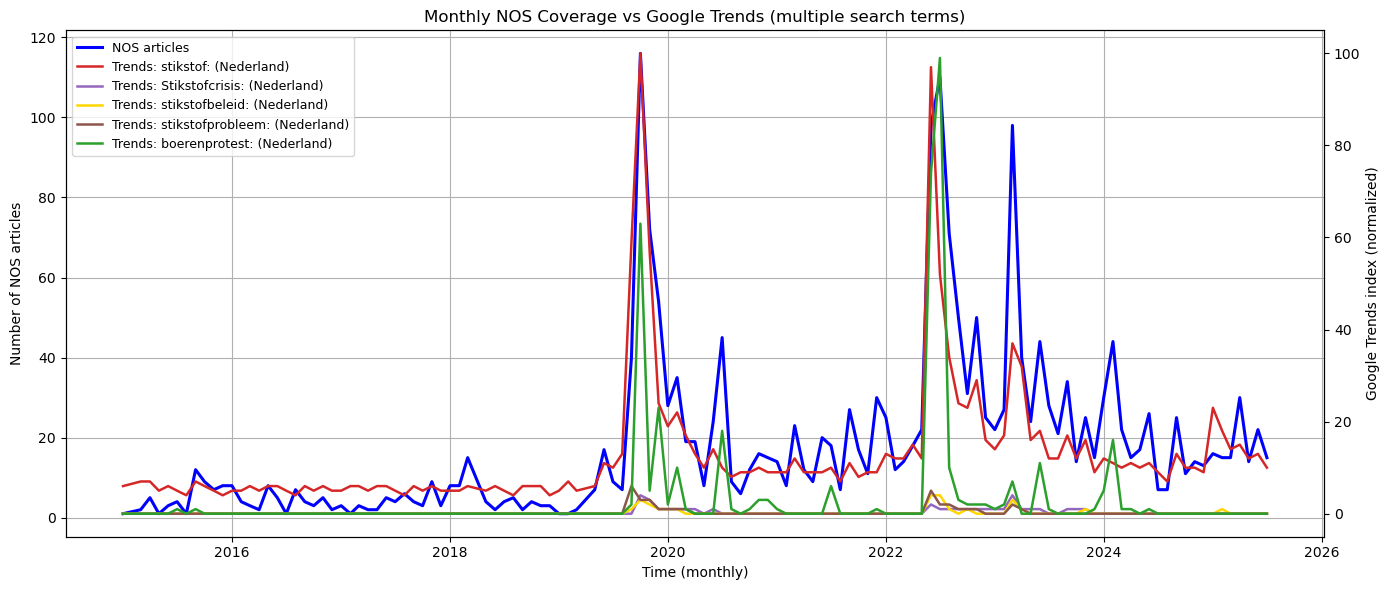

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================================================
# 0) INPUT PATHS
# =========================================================
TRENDS_PATH = r"C:\Users\Max van der Slot\Downloads\multiTimeline2.csv"

# =========================================================
# 1) NOS -> maandelijkse telling
# =========================================================
df_nos = df_filtered.copy()
df_nos["published_time"] = pd.to_datetime(df_nos["published_time"], errors="coerce")
df_nos = df_nos.dropna(subset=["published_time"])

df_nos["year_month"] = df_nos["published_time"].dt.to_period("M")

nos_monthly = (
    df_nos.groupby("year_month")
    .size()
    .reset_index(name="NOS_article_count")
)
nos_monthly["date"] = nos_monthly["year_month"].dt.to_timestamp()
nos_monthly = nos_monthly[["date", "NOS_article_count"]].sort_values("date")

# =========================================================
# 2) Google Trends -> meerdere zoektermen inladen + opschonen
# =========================================================
df_trends_raw = pd.read_csv(TRENDS_PATH, skiprows=1)

date_col = df_trends_raw.columns[0]
term_cols = list(df_trends_raw.columns[1:])

df_trends = df_trends_raw[[date_col] + term_cols].copy()
df_trends = df_trends.rename(columns={date_col: "date"})
df_trends["date"] = pd.to_datetime(df_trends["date"], errors="coerce")
df_trends = df_trends.dropna(subset=["date"])

for c in term_cols:
    df_trends[c] = df_trends[c].astype(str).str.replace("<1", "0", regex=False)
    df_trends[c] = pd.to_numeric(df_trends[c], errors="coerce")

term_cols = [c for c in term_cols if df_trends[c].notna().any()]

# =========================================================
# 3) Merge NOS + Trends op maand (date)
# =========================================================
combined = pd.merge(
    nos_monthly,
    df_trends[["date"] + term_cols],
    on="date",
    how="inner"
).sort_values("date")

print("Trends term columns used:")
for c in term_cols:
    print(" -", c)

# =========================================================
# 4) Plot: juiste kleuren + normale lijnen
# =========================================================
def pick_color(colname: str):
    n = colname.lower()
    if "stikstofcrisis" in n:
        return "tab:purple"
    if "stikstofbeleid" in n:
        return "gold"          # <- tab:yellow bestaat niet
    if "stikstofprobleem" in n:
        return "tab:brown"
    if "boerenprotest" in n:
        return "tab:green"
    if "stikstof" in n:
        return "tab:red"
    return None  # default matplotlib kleur

fig, ax1 = plt.subplots(figsize=(14, 6))

# NOS lijn
ax1.plot(
    combined["date"],
    combined["NOS_article_count"],
    color="blue",
    linewidth=2.2,
    label="NOS articles"
)
ax1.set_xlabel("Time (monthly)")
ax1.set_ylabel("Number of NOS articles")
ax1.grid(True)

# Trends lijnen
ax2 = ax1.twinx()
for c in term_cols:
    ax2.plot(
        combined["date"],
        combined[c],
        linestyle="-",
        linewidth=1.8,
        color=pick_color(c),
        label=f"Trends: {c}"
    )

ax2.set_ylabel("Google Trends index (normalized)")
plt.title("Monthly NOS Coverage vs Google Trends (multiple search terms)")

# Legenda combineren
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left", fontsize=9)

fig.tight_layout()
plt.show()


In [47]:
import pandas as pd
from functools import reduce

# === keywords ===
keywords = ["stikstof", "stikstofcrisis", "stikstofbeleid", "stikstofprobleem", "boerenprotest"]
text_cols = ["title", "keywords", "section", "description", "content"]

# === start van de NOS dataset ===
df_kw = df.copy()
df_kw["published_time"] = pd.to_datetime(df_kw["published_time"], errors="coerce")
df_kw = df_kw.dropna(subset=["published_time"])
df_kw["year_month"] = df_kw["published_time"].dt.to_period("M")

# === per keyword counts (overlap toegestaan) ===
tables = []
for kw in keywords:
    mask_kw = False
    for col in text_cols:
        mask_kw = mask_kw | df_kw[col].astype(str).str.contains(kw, case=False, na=False)
    monthly = df_kw[mask_kw].groupby("year_month").size().reset_index(name=kw)
    tables.append(monthly)

keyword_monthly = reduce(
    lambda left, right: pd.merge(left, right, on="year_month", how="outer"),
    tables
).fillna(0)

# === unique articles (OR, geen overlap) ===
pattern_any = "|".join(keywords)
mask_any = False
for col in text_cols:
    mask_any = mask_any | df_kw[col].astype(str).str.contains(pattern_any, case=False, na=False)

unique_monthly = (
    df_kw[mask_any]
    .groupby("year_month")
    .size()
    .reset_index(name="unique_articles")
)

# === combine + totals ===
out = pd.merge(keyword_monthly, unique_monthly, on="year_month", how="outer").fillna(0)
out["date"] = out["year_month"].dt.to_timestamp()
out["total_keywords"] = out[keywords].sum(axis=1)

# ints + sort
out = out.sort_values("date")
for c in keywords + ["unique_articles", "total_keywords"]:
    out[c] = out[c].astype(int)

# === FILTER: alleen heel 2019 ===
out_2019 = out[
    (out["date"] >= "2019-01-01") &
    (out["date"] <= "2019-12-31")
]

display(out_2019)


,year_month,stikstof,stikstofcrisis,stikstofbeleid,stikstofprobleem,boerenprotest,unique_articles,date,total_keywords
46,2019-01,1,0,0,0,0,1,2019-01-01,1
47,2019-02,1,0,0,0,0,1,2019-02-01,1
48,2019-03,2,0,0,0,0,2,2019-03-01,2
49,2019-05,7,0,0,0,0,7,2019-05-01,7
50,2019-06,17,1,3,0,0,17,2019-06-01,21
51,2019-07,8,0,1,1,1,9,2019-07-01,11
52,2019-08,7,0,0,0,0,7,2019-08-01,7
53,2019-09,40,2,4,10,1,40,2019-09-01,57
54,2019-10,101,30,15,12,51,116,2019-10-01,209
55,2019-11,67,25,9,9,15,72,2019-11-01,125


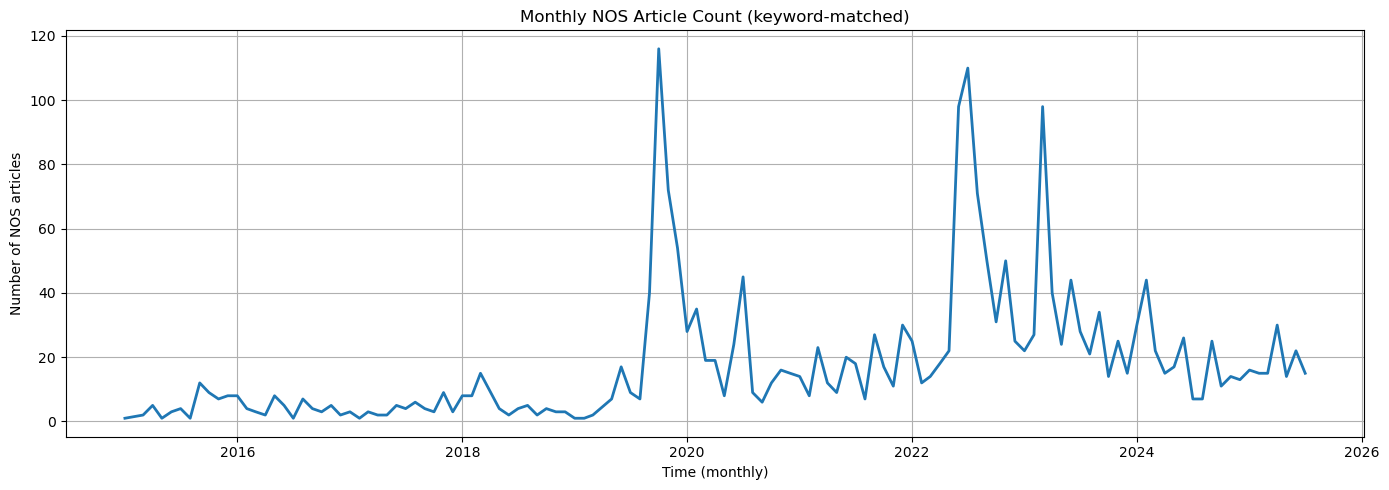

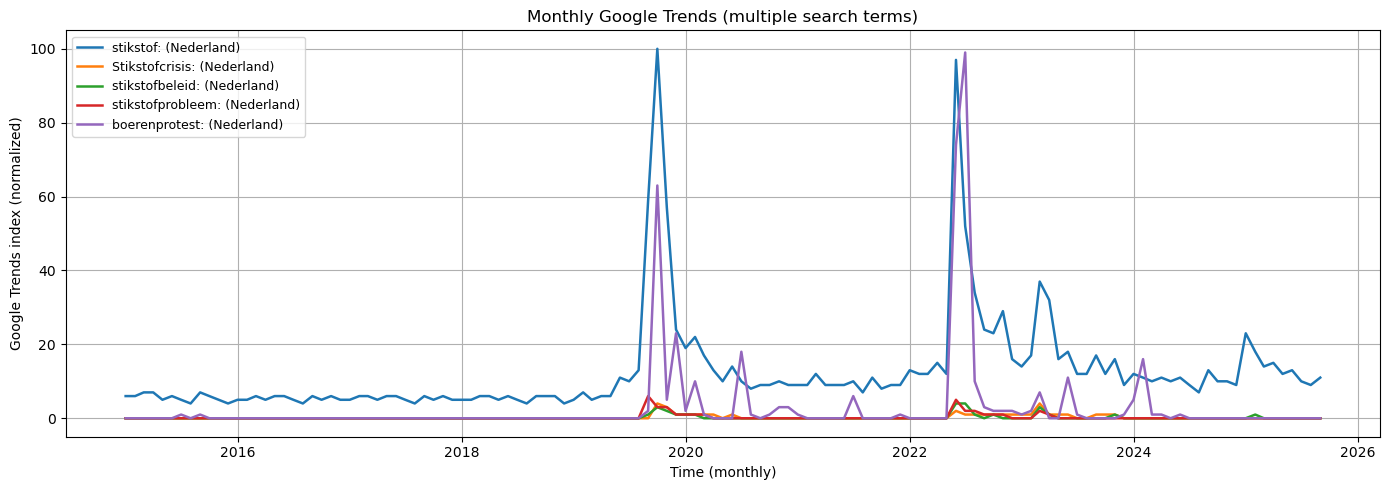

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# ====== INPUTS ======
TRENDS_PATH = r"C:\Users\Max van der Slot\Downloads\multiTimeline2.csv"
# df_filtered moet bestaan (NOS artikelen gefilterd op keywords), met kolom 'published_time'

# =========================================================
# 1) NOS -> maandelijkse telling (1 lijn)
# =========================================================
df_nos = df_filtered.copy()
df_nos["published_time"] = pd.to_datetime(df_nos["published_time"], errors="coerce")
df_nos = df_nos.dropna(subset=["published_time"])

df_nos["year_month"] = df_nos["published_time"].dt.to_period("M")

nos_monthly = (
    df_nos.groupby("year_month")
    .size()
    .reset_index(name="NOS_article_count")
)
nos_monthly["date"] = nos_monthly["year_month"].dt.to_timestamp()
nos_monthly = nos_monthly.sort_values("date")

# =========================================================
# 2) Google Trends -> meerdere zoektermen (meerdere lijnen)
# =========================================================
df_trends_raw = pd.read_csv(TRENDS_PATH, skiprows=1)
date_col = df_trends_raw.columns[0]
term_cols = list(df_trends_raw.columns[1:])

df_trends = df_trends_raw[[date_col] + term_cols].copy()
df_trends = df_trends.rename(columns={date_col: "date"})
df_trends["date"] = pd.to_datetime(df_trends["date"], errors="coerce")
df_trends = df_trends.dropna(subset=["date"])

for c in term_cols:
    df_trends[c] = df_trends[c].astype(str).str.replace("<1", "0", regex=False)
    df_trends[c] = pd.to_numeric(df_trends[c], errors="coerce")

term_cols = [c for c in term_cols if df_trends[c].notna().any()]
df_trends = df_trends[["date"] + term_cols].sort_values("date")

# =========================================================
# 3) Plot 1: NOS articles (apart)
# =========================================================
plt.figure(figsize=(14, 5))
plt.plot(nos_monthly["date"], nos_monthly["NOS_article_count"], linewidth=2)
plt.title("Monthly NOS Article Count (keyword-matched)")
plt.xlabel("Time (monthly)")
plt.ylabel("Number of NOS articles")
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================================================
# 4) Plot 2: Google Trends (alle termen apart)
# =========================================================
plt.figure(figsize=(14, 5))
for c in term_cols:
    plt.plot(df_trends["date"], df_trends[c], linewidth=1.8, label=c)

plt.title("Monthly Google Trends (multiple search terms)")
plt.xlabel("Time (monthly)")
plt.ylabel("Google Trends index (normalized)")
plt.grid(True)
plt.legend(loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()

# (optioneel) tabellen laten zien
# display(nos_monthly.head())
# display(df_trends.head())


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import os

EVENTS_PATH = "Protest_regel_data.txt"  # of plak "Copy Relative Path" hier

# --- NOS monthly ---
df_nos = df_filtered.copy()
df_nos["published_time"] = pd.to_datetime(df_nos["published_time"], errors="coerce")
df_nos = df_nos.dropna(subset=["published_time"])
df_nos["year_month"] = df_nos["published_time"].dt.to_period("M")

nos_monthly = (
    df_nos.groupby("year_month")
    .size()
    .reset_index(name="NOS_article_count")
)
nos_monthly["date"] = nos_monthly["year_month"].dt.to_timestamp()
nos_monthly = nos_monthly.sort_values("date")

# --- Events read (robust) ---
if not os.path.exists(EVENTS_PATH) or os.path.getsize(EVENTS_PATH) == 0:
    raise FileNotFoundError(
        f"Events file not found or empty: {os.path.abspath(EVENTS_PATH)}. "
        "Check location + make sure the file is saved and not empty."
    )

events = pd.read_csv(EVENTS_PATH, sep=";", encoding="utf-8-sig", engine="python")
events["Date"] = pd.to_datetime(events["Date"], errors="coerce")
events = events.dropna(subset=["Date"])

# selecteer een paar key events (hou het netjes)
key_event_names = [
    "PAS Ruling Council of State",
    "First Mass Protest",
    "Nitrogen Map Presentation",
    "New Coalition Agreement",
]
events_key = events[events["Event"].isin(key_event_names)].copy()

# alleen binnen plot-range
events_key = events_key[
    (events_key["Date"] >= nos_monthly["date"].min()) &
    (events_key["Date"] <= nos_monthly["date"].max())
].sort_values("Date")

# --- Plot ---
plt.figure(figsize=(14, 5))
plt.plot(nos_monthly["date"], nos_monthly["NOS_article_count"], linewidth=2, label="NOS articles")

ymax = nos_monthly["NOS_article_count"].max() if len(nos_monthly) else 1

for _, row in events_key.iterrows():
    plt.axvline(row["Date"], linestyle="--", alpha=0.6)
    plt.text(
        row["Date"],
        ymax * 0.98,
        row["Event"],
        rotation=90,
        va="top",
        ha="right",
        fontsize=8
    )

plt.title("Monthly NOS Article Count (keyword-matched) + Key Events")
plt.xlabel("Time (monthly)")
plt.ylabel("Number of NOS articles")
plt.grid(True)
plt.tight_layout()
plt.show()


FileNotFoundError: Events file not found or empty: c:\Users\Max van der Slot\Desktop\Social_Computing\Protest_regel_data.txt. Check location + make sure the file is saved and not empty.

In [58]:
import os

EVENTS_PATH = os.path.join(os.getcwd(), "Protest_regel_data.txt")

data = """Date;Type;Event;Location;Description
2015-04-01;Policy;End of Milk Quotas;National;Start of unrestricted milk production (herd growth)
2015-07-01;Policy;Introduction of PAS;National;Start of legal nitrogen framework
2018-01-01;Policy;Phosphate Rights;National;Mandatory reduction of dairy herd
2019-05-29;Policy;PAS Ruling Council of State;The Hague;Legal lockdown on NL (start of nitrogen crisis)
2019-09-25;Policy;Remkes Report;The Hague;First major advice on drastic herd reduction
2019-10-01;Protest;First Mass Protest;The Hague (Malieveld);Largest tractor-led traffic jam in history
2019-10-14;Protest;Provincial House Protests;Groningen;Storming of the Groningen provincial building
2019-10-16;Protest;RIVM & Binnenhof;De Bilt/The Hague;Doubt cast on RIVM calculation models
2019-10-25;Protest;Provincial House Brabant;Den Bosch;Resistance to local nitrogen regulations
2019-12-17;Policy;Emergency Nitrogen Act;National;Daytime speed limit reduced to 100 km/h
2019-12-18;Protest;Code Red;National/Hilversum;Distribution center blockades and Media Park action
2020-02-19;Protest;Agricultural Protest;The Hague (Koekamp);Frustration over lack of future prospects
2020-07-10;Protest;Distribution Center Blockades;Zwolle/Nijkerk;Opposition to protein limits in animal feed
2020-11-17;Protest;Black Book Submission;The Hague;Critique of policy during COVID-19 lockdowns
2020-12-12;Protest;Christmas Actions;National;Public-friendly light-tractor actions and blockades
2021-07-07;Protest;National Day of Action;The Hague;Response to new farm-closure reports
2022-06-10;Policy;Nitrogen Map Presentation;The Hague;Zoning map with reduction targets up to 95%
2022-06-22;Protest;Mass Protest Stroe;Gelderland (Stroe);Massive turnout against area-specific targets
2022-06-27;Protest;Highway Actions;National;Wildcat blockades and tractor fires
2022-06-28;Protest;Minister House Visit;Utrecht;Protest at the private home of Minister Van der Wal
2022-07-04;Protest;DC Blockades;National;Coordinated shutdown of supermarket supply chains
2022-08-05;Protest;Highway Dumping;National;Asbestos and waste dumping after Remkes deadline
2022-09-30;Policy;End of Derogation Decision;Brussels;EU revokes Dutch manure exemption
2023-01-01;Policy;Start of Derogation Phase-out;National;Reduction of manure limits (manure crisis)
2023-03-11;Protest;Pre-election Protest;The Hague (Zuiderpark);Final major protest before 2023 elections
2023-03-15;Policy;2023 Provincial Elections;National;Landslide victory for BBB party (discourse shift)
2023-06-22;Policy;Collapse of Agricultural Accord;The Hague;Failure of negotiations on sector future
2023-07-03;Policy;Opening of LBV+ Buyout;National;Launch of multi-billion buyout for "peak emitters"
2024-02-01;Protest;Provincial Actions;National;Solidarity with European farmer protests
2024-02-05;Protest;Night-time Blockades;A15/A50;Burning hay bales against manure policy
2024-02-12;Protest;Provincial House NH;Haarlem;North Holland provincial nitrogen policy protest
2024-05-14;Policy;New Coalition Agreement;The Hague;New government officially scraps the Nitrogen Map
2025-01-01;Policy;Derogation Step 2025;National;Further manure use restrictions
2025-02-14;Policy;Minister Wiersma Letter;The Hague;Shift towards "goal-steering" policy
2025-05-28;Protest;Regional Quiet Protest;Drenthe;Resistance to local nature restoration plans
2025-09-01;Policy;Start of 30% Skimming;National;Livestock reduction via trading rights skimming
"""

with open(EVENTS_PATH, "w", encoding="utf-8") as f:
    f.write(data)

print("Wrote events to:", EVENTS_PATH)
print("New size (bytes):", os.path.getsize(EVENTS_PATH))


Wrote events to: c:\Users\Max van der Slot\Desktop\Social_Computing\Protest_regel_data.txt
New size (bytes): 3493


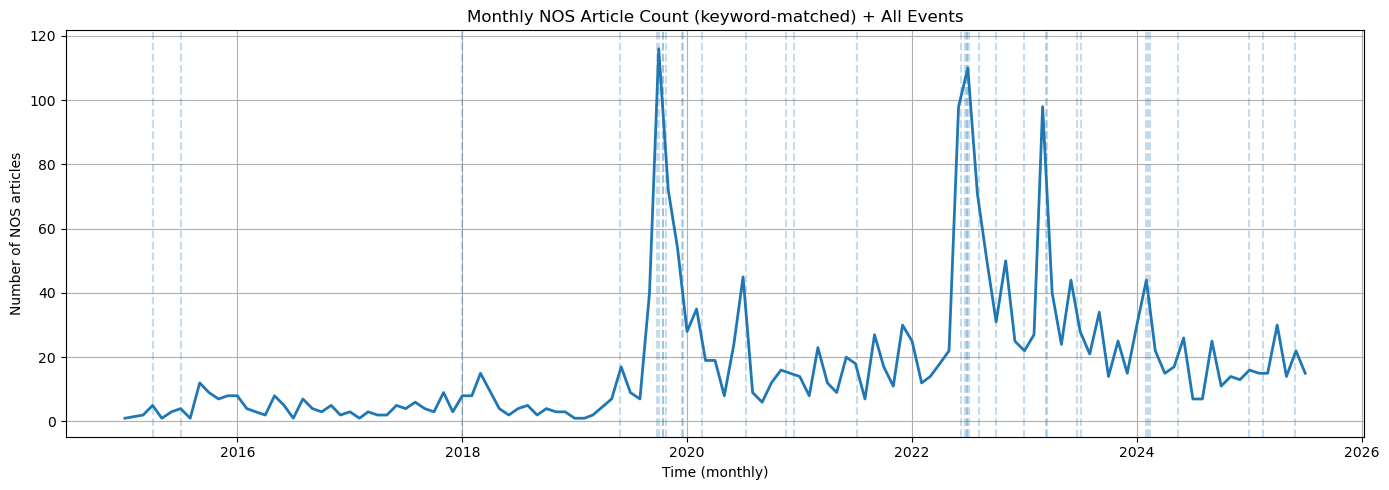

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# =========================================================
# INPUT
# =========================================================
EVENTS_PATH = os.path.join(os.getcwd(), "Protest_regel_data.txt")
# df_filtered moet al bestaan met kolom 'published_time'

# =========================================================
# 1) NOS -> maandelijkse telling
# =========================================================
df_nos = df_filtered.copy()
df_nos["published_time"] = pd.to_datetime(df_nos["published_time"], errors="coerce")
df_nos = df_nos.dropna(subset=["published_time"])

df_nos["year_month"] = df_nos["published_time"].dt.to_period("M")

nos_monthly = (
    df_nos.groupby("year_month")
    .size()
    .reset_index(name="NOS_article_count")
)
nos_monthly["date"] = nos_monthly["year_month"].dt.to_timestamp()
nos_monthly = nos_monthly.sort_values("date")

# =========================================================
# 2) Events inlezen (ALLE events)
# =========================================================
events = pd.read_csv(EVENTS_PATH, sep=";", encoding="utf-8-sig", engine="python")
events["Date"] = pd.to_datetime(events["Date"], errors="coerce")
events = events.dropna(subset=["Date"])

# alleen events binnen de NOS-periode
events_in_range = events[
    (events["Date"] >= nos_monthly["date"].min()) &
    (events["Date"] <= nos_monthly["date"].max())
].sort_values("Date")

# =========================================================
# 3) Plot 1: NOS + ALLE event-lijnen
# =========================================================
plt.figure(figsize=(14, 5))

# NOS lijn
plt.plot(
    nos_monthly["date"],
    nos_monthly["NOS_article_count"],
    linewidth=2,
    label="NOS articles"
)

# alle events als dunne verticale lijnen
for d in events_in_range["Date"]:
    plt.axvline(d, linestyle="--", alpha=0.25)

plt.title("Monthly NOS Article Count (keyword-matched) + All Events")
plt.xlabel("Time (monthly)")
plt.ylabel("Number of NOS articles")
plt.grid(True)
plt.tight_layout()
plt.show()


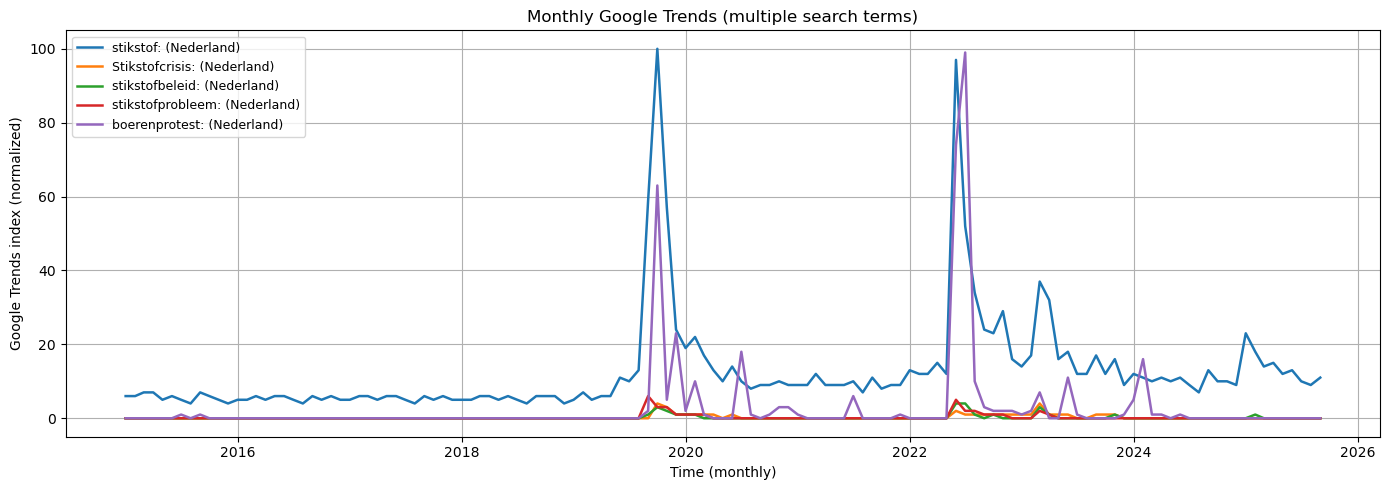

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# ====== INPUTS ======
TRENDS_PATH = r"C:\Users\Max van der Slot\Downloads\multiTimeline2.csv"

# =========================================================
# Google Trends -> meerdere zoektermen (meerdere lijnen)
# =========================================================
df_trends_raw = pd.read_csv(TRENDS_PATH, skiprows=1)
date_col = df_trends_raw.columns[0]
term_cols = list(df_trends_raw.columns[1:])

df_trends = df_trends_raw[[date_col] + term_cols].copy()
df_trends = df_trends.rename(columns={date_col: "date"})
df_trends["date"] = pd.to_datetime(df_trends["date"], errors="coerce")
df_trends = df_trends.dropna(subset=["date"])

for c in term_cols:
    df_trends[c] = df_trends[c].astype(str).str.replace("<1", "0", regex=False)
    df_trends[c] = pd.to_numeric(df_trends[c], errors="coerce")

term_cols = [c for c in term_cols if df_trends[c].notna().any()]
df_trends = df_trends[["date"] + term_cols].sort_values("date")

# =========================================================
# Plot 2
# =========================================================
plt.figure(figsize=(14, 5))
for c in term_cols:
    plt.plot(df_trends["date"], df_trends[c], linewidth=1.8, label=c)

plt.title("Monthly Google Trends (multiple search terms)")
plt.xlabel("Time (monthly)")
plt.ylabel("Google Trends index (normalized)")
plt.grid(True)
plt.legend(loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()


In [62]:
# events -> maand
events["year_month"] = events["Date"].dt.to_period("M")

# set van maanden waarin events zijn
event_months = set(events["year_month"])

# dummy variabele
nos_monthly["event_dummy"] = nos_monthly["year_month"].isin(event_months).astype(int)


In [64]:
import pandas as pd

# ====== INPUTS ======
search_words = [
    "stikstof",
    "stikstofcrisis",
    "stikstofbeleid",
    "stikstofprobleem",
    "boerenprotest",
]
text_cols = ["title", "keywords", "section", "description", "content"]

# df_filtered moet bestaan (jij hebt die al)
df_nos = df_filtered.copy()
df_nos["published_time"] = pd.to_datetime(df_nos["published_time"], errors="coerce")
df_nos = df_nos.dropna(subset=["published_time"])
df_nos["year_month"] = df_nos["published_time"].dt.to_period("M")

# ====== 1) Basis tabel: total NOS per maand ======
master_monthly = (
    df_nos.groupby("year_month")
    .size()
    .reset_index(name="NOS_total")
)

# ====== 2) Per keyword: aantal artikelen per maand waarin keyword voorkomt ======
for kw in search_words:
    mask_kw = False
    for col in text_cols:
        mask_kw = mask_kw | df_nos[col].astype(str).str.contains(kw, case=False, na=False)

    kw_monthly = (
        df_nos[mask_kw]
        .groupby("year_month")
        .size()
        .reset_index(name=f"kw_{kw}")
    )

    master_monthly = master_monthly.merge(kw_monthly, on="year_month", how="left")

# missing -> 0
kw_cols = [f"kw_{kw}" for kw in search_words]
master_monthly[kw_cols] = master_monthly[kw_cols].fillna(0).astype(int)

# ====== 3) Voeg date kolom toe ======
master_monthly["date"] = master_monthly["year_month"].dt.to_timestamp()
master_monthly = master_monthly.sort_values("date").reset_index(drop=True)

# ====== 4) Google Trends toevoegen (robust: pak juiste kolom automatisch) ======
df_tr = df_trends.copy()

# zorg dat er een 'date' kolom is
if "date" not in df_tr.columns:
    raise KeyError(f"df_trends heeft geen kolom 'date'. Kolommen: {list(df_tr.columns)}")

# kies de trends value kolom: eerste kolom die niet 'date' is
trend_value_cols = [c for c in df_tr.columns if c != "date"]
if len(trend_value_cols) == 0:
    raise KeyError(f"df_trends heeft geen trends-waarde kolom. Kolommen: {list(df_tr.columns)}")

trend_value_col = trend_value_cols[0]  # neem de eerste (bij jou is dit de juiste)
df_tr = df_tr.rename(columns={trend_value_col: "Google_Trends_index"})

df_tr["date"] = pd.to_datetime(df_tr["date"], errors="coerce")
df_tr = df_tr.dropna(subset=["date"]).sort_values("date")

master_monthly = master_monthly.merge(
    df_tr[["date", "Google_Trends_index"]],
    on="date",
    how="left"
)


In [65]:
print(df_trends.columns)


Index(['date', 'stikstof: (Nederland)', 'Stikstofcrisis: (Nederland)',
       'stikstofbeleid: (Nederland)', 'stikstofprobleem: (Nederland)',
       'boerenprotest: (Nederland)'],
      dtype='object')


In [67]:
display(
    master_monthly[
        (master_monthly["date"] >= "2019-01-01") &
        (master_monthly["date"] <= "2019-12-31")
    ].head(15)
)


,year_month,NOS_total,kw_stikstof,kw_stikstofcrisis,kw_stikstofbeleid,kw_stikstofprobleem,kw_boerenprotest,date,Google_Trends_index
46,2019-01,1,1,0,0,0,0,2019-01-01,5
47,2019-02,1,1,0,0,0,0,2019-02-01,7
48,2019-03,2,2,0,0,0,0,2019-03-01,5
49,2019-05,7,7,0,0,0,0,2019-05-01,6
50,2019-06,17,17,1,3,0,0,2019-06-01,11
51,2019-07,9,8,0,1,1,1,2019-07-01,10
52,2019-08,7,7,0,0,0,0,2019-08-01,13
53,2019-09,40,40,2,4,10,1,2019-09-01,59
54,2019-10,116,101,30,15,12,51,2019-10-01,100
55,2019-11,72,67,25,9,9,15,2019-11-01,57


In [68]:
import pandas as pd
from scipy.stats import spearmanr, pearsonr

# ====== 1) Kies je input kolommen ======
x_col = "NOS_total"
y_col = "Google_Trends_index"

# (optioneel) alleen 2019 testen:
only_2019 = False

df_test = master_monthly.copy()

if only_2019:
    df_test = df_test[df_test["year_month"].astype(str).str.startswith("2019")]

# ====== 2) Schoonmaken: alleen rijen waar beide waarden bestaan ======
df_test = df_test[["date", "year_month", x_col, y_col]].dropna()

print("N (maanden):", len(df_test))
display(df_test.head())

# ====== 3) Spearman correlatie (aanrader) ======
rho, p_s = spearmanr(df_test[x_col], df_test[y_col])
print("\n=== Spearman correlation (exploratory) ===")
print("rho:", round(rho, 3))
print("p-value:", round(p_s, 4))

# ====== 4) (optioneel) Pearson correlatie ======
r, p_p = pearsonr(df_test[x_col], df_test[y_col])
print("\n=== Pearson correlation (optional) ===")
print("r:", round(r, 3))
print("p-value:", round(p_p, 4))

print("\nInterpretatie (Phase 2): This test is exploratory and does not imply causality.")


N (maanden): 124


,date,year_month,NOS_total,Google_Trends_index
0,2015-01-01,2015-01,1,6
1,2015-03-01,2015-03,2,7
2,2015-04-01,2015-04,5,7
3,2015-05-01,2015-05,1,5
4,2015-06-01,2015-06,3,6



=== Spearman correlation (exploratory) ===
rho: 0.865
p-value: 0.0

=== Pearson correlation (optional) ===
r: 0.868
p-value: 0.0

Interpretatie (Phase 2): This test is exploratory and does not imply causality.


In [70]:
# ===============================
# Google Trends: alle termen netjes opschonen
# ===============================
df_tr = df_trends.copy()

# datum goed zetten
df_tr["date"] = pd.to_datetime(df_tr["date"], errors="coerce")
df_tr = df_tr.dropna(subset=["date"]).sort_values("date")

# alle trends-kolommen
trend_cols = [c for c in df_tr.columns if c != "date"]

# "<1" fix + numeric
for c in trend_cols:
    df_tr[c] = (
        df_tr[c].astype(str)
        .str.replace("<1", "0", regex=False)
    )
    df_tr[c] = pd.to_numeric(df_tr[c], errors="coerce")

print("Google Trends kolommen:")
print(trend_cols)

display(df_tr.head())

# ===============================
# Google Trends toevoegen aan master_monthly
# ===============================

# (veilig) oude samengeperste kolom weg
master_monthly = master_monthly.drop(columns=["Google_Trends_index"], errors="ignore")

# merge ALLE trends kolommen
master_monthly = master_monthly.merge(
    df_tr[["date"] + trend_cols],
    on="date",
    how="left"
)

display(master_monthly.head())



Google Trends kolommen:
['stikstof: (Nederland)', 'Stikstofcrisis: (Nederland)', 'stikstofbeleid: (Nederland)', 'stikstofprobleem: (Nederland)', 'boerenprotest: (Nederland)']


,date,stikstof: (Nederland),Stikstofcrisis: (Nederland),stikstofbeleid: (Nederland),stikstofprobleem: (Nederland),boerenprotest: (Nederland)
0,2015-01-01,6,0,0,0,0
1,2015-02-01,6,0,0,0,0
2,2015-03-01,7,0,0,0,0
3,2015-04-01,7,0,0,0,0
4,2015-05-01,5,0,0,0,0


,year_month,NOS_total,kw_stikstof,kw_stikstofcrisis,kw_stikstofbeleid,kw_stikstofprobleem,kw_boerenprotest,date,stikstof: (Nederland),Stikstofcrisis: (Nederland),stikstofbeleid: (Nederland),stikstofprobleem: (Nederland),boerenprotest: (Nederland)
0,2015-01,1,1,0,0,0,0,2015-01-01,6,0,0,0,0
1,2015-03,2,2,0,0,0,0,2015-03-01,7,0,0,0,0
2,2015-04,5,5,0,0,0,0,2015-04-01,7,0,0,0,0
3,2015-05,1,1,0,0,0,0,2015-05-01,5,0,0,0,0
4,2015-06,3,3,0,0,0,0,2015-06-01,6,0,0,0,0


In [73]:
from scipy.stats import spearmanr

# Kolommen
x_col = "NOS_total"
y_col = "stikstof: (Nederland)"   # Google Trends kernterm

# Dataset voor test
df_test = master_monthly[
    ["date", x_col, y_col]
].dropna()

print("N (maanden):", len(df_test))
display(df_test.head())

# Spearman correlatie over volledige periode
rho, p_value = spearmanr(
    df_test[x_col],
    df_test[y_col]
)

print("\n=== Spearman correlation (full period) ===")
print(f"rho = {rho:.3f}")
print(f"p-value = {p_value:.4f}")
print("This test is exploratory and does not imply causality.")


N (maanden): 124


,date,NOS_total,stikstof: (Nederland)
0,2015-01-01,1,6
1,2015-03-01,2,7
2,2015-04-01,5,7
3,2015-05-01,1,5
4,2015-06-01,3,6



=== Spearman correlation (full period) ===
rho = 0.865
p-value = 0.0000
This test is exploratory and does not imply causality.


In [74]:
from scipy.stats import spearmanr

x_col = "NOS_total"
y_col = "Stikstofcrisis: (Nederland)"

df_test = master_monthly[[x_col, y_col]].dropna()

rho, p_value = spearmanr(df_test[x_col], df_test[y_col])

print("NOS_total ↔ stikstofcrisis")
print(f"rho = {rho:.3f}")
print(f"p-value = {p_value:.4f}")
print("Exploratory — no causality implied.")


NOS_total ↔ stikstofcrisis
rho = 0.605
p-value = 0.0000
Exploratory — no causality implied.


In [75]:
from scipy.stats import spearmanr

x_col = "NOS_total"
y_col = "stikstofbeleid: (Nederland)"

df_test = master_monthly[[x_col, y_col]].dropna()

rho, p_value = spearmanr(df_test[x_col], df_test[y_col])

print("NOS_total ↔ stikstofbeleid")
print(f"rho = {rho:.3f}")
print(f"p-value = {p_value:.4f}")
print("Exploratory — no causality implied.")


NOS_total ↔ stikstofbeleid
rho = 0.494
p-value = 0.0000
Exploratory — no causality implied.


In [79]:
from scipy.stats import spearmanr

x_col = "NOS_total"
y_col = "stikstofprobleem: (Nederland)"

df_test = master_monthly[[x_col, y_col]].dropna()

rho, p_value = spearmanr(df_test[x_col], df_test[y_col])

print("NOS_total ↔ stikstofprobleem")
print(f"rho = {rho:.3f}")
print(f"p-value (scientific): {p_value:.2e}")
print("Exploratory — no causality implied.")


NOS_total ↔ stikstofprobleem
rho = 0.536
p-value (scientific): 1.37e-10
Exploratory — no causality implied.


In [78]:
from scipy.stats import spearmanr

x_col = "NOS_total"
y_col = "boerenprotest: (Nederland)"

df_test = master_monthly[[x_col, y_col]].dropna()

rho, p_value = spearmanr(df_test[x_col], df_test[y_col])

print("NOS_total ↔ boerenprotest")
print(f"rho = {rho:.3f}")
print(f"p-value (scientific): {p_value:.2e}")
print("Exploratory — no causality implied.")


NOS_total ↔ boerenprotest
rho = 0.639
p-value (scientific): 1.33e-15
Exploratory — no causality implied.
